Chapter 1: MPI Greetings

```c
sprintf(var_to_store_string, string, f_values);
sprintf(message, "Greetings from process %d!", my_rank);
```

```c
// my rank and total number of processor
MPI_Comm_rank(MPI_COMM_WORLD, &my_rank);
MPI_Comm_size(MPI_COMM_WORLD, &p);
```

<b><u>Count is the number of data, not memory size!</b></u>
<pre>
a_lrow*a_col is correct.
a_lrow*a_col*sizeof(double) is wrong.
</pre>

<u>Recap of pointer and array</u>

```c
// start of an array
double *a_l_array = NULL;
// scan values into the array
fscanf(file_pointer2, "%lf\n", a_l_array+j);
// no need to put the ampersand
// j points out the index
// carefull using operator like ++, it changes the pointer idx

// printing the value
printf("%lf", *(a_l_array+j));
// similar
printf("%lf", a_l_array[j]);


```


```c
int MPI_Send(
    void* message, //input
    int count, //input
    MPI_Datatype datatype, //input
    int dest, //input
    int tag, //input
    MPI_Comm comm //input
);

int MPI_Recv(
    void* message, //input
    int count, //input
    MPI_Datatype datatype, //input
    int source, //input
    int tag, //input
    MPI_Comm comm, //input
    MPI_Status* status // output
);

// tag is important as it helps to differentiate different message
```

MPI_Send and MPI_Recv returns int value and these are error code. Also MPI aborts operations if any error happens. So checking these error code and terminate is not necessary.

```c
int MPI_Get_count(
    MPI_Status* status, //input 
    MPI_Datatype datatype, //input
    int* count_pointer //output
)

// Example
// Receive the buffer
int buffer[3];
MPI_Status status;
MPI_Recv(buffer, 3, MPI_INT, SENDER, 0, MPI_COMM_WORLD, &status);

// Retrieve the number of elements (should be 3)
int count;
MPI_Get_count(&status, MPI_INT, &count);
printf("Number of elements retrieved from the message received: %d.\n", count);

```

1.3 Timing in MPI

```c
// this gives the wall clock time
double MPI_Wtime(void);

double t1, t2;
t1 = MPI_Wtime();
...
t2 = MPI_Wtime();

//Every processor syncs here and then next block starts
MPI_Barrier(comm);
```

Chap 2: Numerical Integration

##### Important notes
<u> Collective operations like Bcast must be called by all proccesses in the communicator. </ul>

##### Datatype

<ul>
<li>MPI_CHAR</li>
<li>MPI_WCHAR</li>
<li>MPI_FLOAT</li>
<li>MPI_DOUBLE</li>
<li>MPI_LONG_DOUBLE</li>
</ul>

```c
MPI_Bcast(
    void* data,
    int count,
    MPI_Datatype datatype,
    int root,
    MPI_Comm communicator)
```

<ul>
<li>MPI_MAX - Returns the maximum element.</li>
<li>MPI_MIN - Returns the minimum element.</li>
<li>MPI_SUM - Sums the elements.</li>
<li>MPI_PROD - Multiplies all elements.</li>
<li>MPI_LAND - Performs a logical and across the elements.</li>
<li>MPI_LOR - Performs a logical or across the elements.</li>
<li>MPI_BAND - Performs a bitwise and across the bits of the elements.</li>
<li>MPI_BOR - Performs a bitwise or across the bits of the elements.</li>
<li>MPI_MAXLOC - Returns the maximum value and the rank of the process that owns it.</li>
<li>MPI_MINLOC - Returns the minimum value and the rank of the process that owns it.</li>
</ul>

```c
MPI_Reduce(
    void* send_data,
    void* recv_data,
    int count,
    MPI_Datatype datatype,
    MPI_Op op,
    int root,
    MPI_Comm communicator)

MPI_Allreduce(
    void* send_data,
    void* recv_data,
    int count,
    MPI_Datatype datatype,
    MPI_Op op,
    MPI_Comm communicator)
```

Allreduce is identical to Reduce, the only difference it does not have any
root processor. It takes the variable from all the processor and also updates 
in all the processor.

##### 2.4 I/O on parallel systems

It is better to only let one processor read the input data
and then broadcast or send the data to other processor.


Read input data from cmd 
```c
// from root processor
scanf("%lf %lf %d", &a, &b, &n);
```
sbatch file 
mpirun ./a.out < input.txt
input.txt => 0.0 1.0 500000

##### Chap 3: Collective Communication

##### 3.1 Tree Structured Communication
Instead of send/ recv we can use Bcast and the stages will be reduced from p-1 to ceil(log2(p)). <br/>
<u>ceil means smallest whole number greater or equal to that number </u> <br/>
<pre>
For p=1024,
ceil(log2(1024)) = 10
We reduces 100 factor of communication time!
</pre>

In early days all type of collective communications were point of synchronization. On current system,
because of buffering A (root) can complete two broadcast before B and C begin their calls. But the first MPI_Bcast on B will match the first MPI_Bcast on A. 

##### 3.4 Safety, Buffering, and Synchronization
Unless a system has buffer, execution uses synchronous mode. It is unsafe to assume that there 
will be buffer or sufficient buffer. 
MPI_Send and MPI_Recv are blocking functions. They do not return until the arguments to the functions can be safely modified. i.e., MPI_Send expects a ready destination to receive the message. 

Alternative: non-blocking communications (MPI_Isend/ Irecv), I stands for immediate. 
MPI_Wait can be used to complete communication.
Syntax of Isend and Irecv are very similar to Send and Recv, in addition they have a request parameter to 
complete non blocking operations. 

```c
MPI_Wait (request, status);
```

<b>Question:</b> What happens if one process makes multiple calls to MPI_Send
with the same destination and the same tag?

Nothing. The system uses the ”first in, first out” principle in dealing with
messages and assign an ”internal tag” to them.

Tag matters. It can swap the data. 

##### 3.5 Dot Product

##### 3.6 Matrix Times Vector

MPI_Scatter and MPI_Gather are also collective communication.

Bcast sends the same piece of data to everywhere where Scatter divides the data into chunks to all the processor.

MPI_Scatter takes an array of elements and distributes the elements in the order of process rank. 

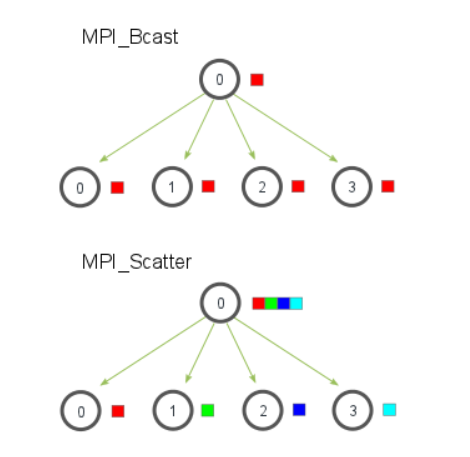

```c
MPI_Scatter(
    void* send_data,
    int send_count,
    MPI_Datatype send_datatype,
    void* recv_data,
    int recv_count,
    MPI_Datatype recv_datatype,
    int root,
    MPI_Comm communicator);
```

Similarly MPI_Gather takes element from each process and gathers to the root process. 

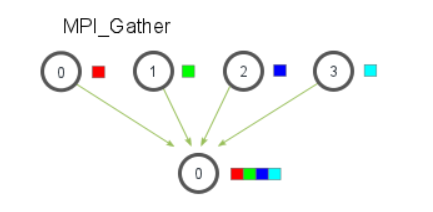

```c
MPI_Gather(
    void* send_data,
    int send_count,
    MPI_Datatype send_datatype,
    void* recv_data,
    int recv_count,
    MPI_Datatype recv_datatype,
    int root,
    MPI_Comm communicator)
```

Pros and Cons of Gather and Scatter
* They can simplify the data exchange but they take the whole memory in the root process, which can be memory expensive.

Allreduce, Allgather are similar, the only difference is that in these cases, all the processors
know the final result, where only root processor will know in case of Reduce or Gather. 

```c
// result has meaning to all processor
// 3.8
int MPI_Allreduce(
    void* operand, 
    void* result,
    int count,
    MPI_Datatype datatype,
    MPI_op operator,
    MPI_Comm comm
);

// 3.9
int MPI_Allgather(
    void* send_data,
    int send_count, 
    MPI_Datatype send_type,
    void* recv_data,
    int recv_count, 
    MPI_Datatype recv_type,
    MPI_Comm comm
)
```

##### 3.10 Matrix X Vector & Matrix X Matrix
There are multiple ways to implement. 
* Block row distribution
* Circular shift 

```c
// 3.9
int MPI_Sendrecv_replace(
    void* buffer, // input/ output
    int count,  //input
    MPI_Datatype datatype, //input
    int dest, //input
    int send_tag, //input
    int source, //input
    int recv_tag, //input
    MPI_Comm comm, //input
    MPI_Status* status //output
)
```

The difference with MPI_Sendrecv is that MPI_Sendrecv_replace uses the same buffer for sending and receiving. This is immportant because MPI does not allow aliasing of output variables, so we need this special function MPI_Sendrecv_replace which allows to use the same buffer. 

##### Ex 4.2

<u> Pointer to function </u>
```c
// declare a pointer variable for a function
// <return-type> (*pointer-var-name)(list of input arg type) = &<function-name>
double (*f_ptr)(double) = &func;
// before
func(...):
//now
(*f_ptr)(...);

// pass as input arg in another func
local_T2N_calc(local_a, local_n, h, &local_T2N, (*f_ptr));
//inside local_T2N_calc, we can use as previous
res = (*f_ptr)(step);
```

4.3 Parallel Fox's algorithm

* Need to boradcast A <sub>i, <b>k</b></sub> across the ith row before multiplication
* and shift the elements of B <sub><b>k</b>, j</sub> up one row after multiplication

Need multiple communicators 

<pre>
MPI_Comm_group : returns the group underlying a commuünicator
MPI_Group_incl : creats a new group ffrom a list of processes in an existing group
MPI_Comm_create : creates a new communicator associates a context to a new group
</pre>

4.5 MPI_Cart_sub

We can partition a grid into grids of lower dimension. 

```c
free_coords[0] = 0; //  row coordinate is fixed
free_coords[1] = 1; // column coordinate is free
// free_coords is an array of booleans
MPI_Cart_sub(grid_comm, free_coords, &col_comm);
```

MPI_Cart_sub is a collective communication and has to be called by all processes in grid comm.